# Naive bayes classifier

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons
def create_itial_data_moons(n_sam, no_s, r_state):
    x_data_f, y_data_f = make_moons ( n_samples = n_sam , shuffle = True , noise = no_s , random_state = r_state)
    return x_data_f, y_data_f
def draw_data(x_d, y_d):
    sns.scatterplot(x=x_d[:, 0], y=x_d[:, 1], hue=y_d, marker="o", s=25, edgecolor="k", legend=False).set_title("Data 'make moon'")


Зображу початкові дані графічно для make_moons

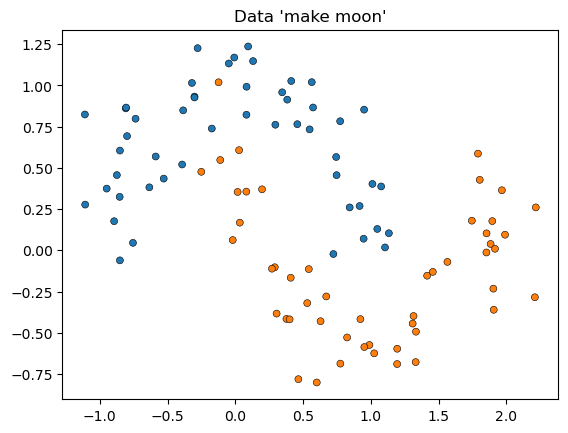

In [3]:
random_state_moon = 20
x_data_moon, y_data_moon = create_itial_data_moons(100, 0.209, random_state_moon)
draw_data(x_data_moon, y_data_moon)


Розбити набір на навчальний та валідаційний

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_moon, y_data_moon, test_size = 0.2, shuffle = True, random_state = random_state_moon, stratify=y_data_moon)


Будую модель класифікації на навчальних даних

In [5]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_GaussianNB = GaussianNB()
naive_bayes_GaussianNB.fit(x_train , y_train)

#print(metrics.accuracy_score(y_predicted , y_test))

GaussianNB()

Зроблю прогноз для naive bayes_GaussianNB model

In [6]:
y_model_gaus = naive_bayes_GaussianNB.predict(x_test)
y_model_gaus1 = naive_bayes_GaussianNB.predict(x_train)


array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
      dtype=int64)

Подивлюсь яка частина даних спрогнозованих моделлю відповідає істинним значенням цих даних, таким чином перевірю модель на перенавченість

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_model_gaus))
print(accuracy_score(y_train, y_model_gaus1))


0.9
0.8125


In [8]:
# модель не є перенавченою адже метрика якості краще у валідаційних даних ніж у навчальних

In [9]:
baes_probs = naive_bayes_GaussianNB.predict_proba(x_test)
baes_probs1 = naive_bayes_GaussianNB.predict_proba(x_train)

Представлю модель графічно
Будую область прийняття класифікатора naive_bayes_GaussianNB

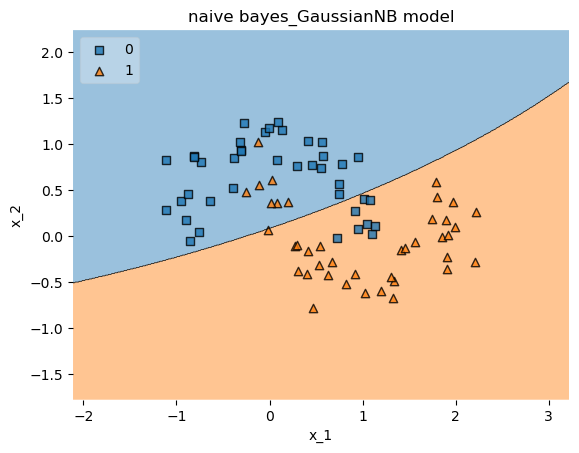

In [10]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(x_train, y_train, clf=naive_bayes_GaussianNB, legend=2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('naive bayes_GaussianNB model')
plt.show()


Text(113.9222222222222, 0.5, 'true value')

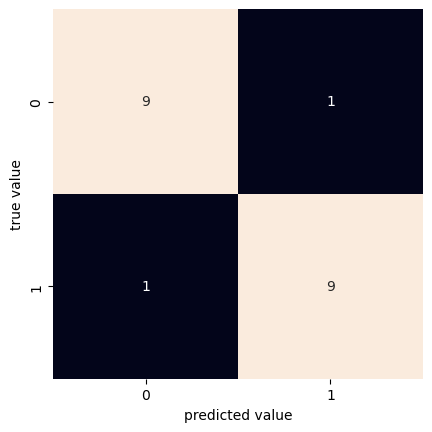

In [11]:
#матриця неточностей для валідаційних даних
from sklearn.metrics import confusion_matrix
mat_gaus = confusion_matrix(y_test, y_model_gaus)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

Text(113.9222222222222, 0.5, 'true value')

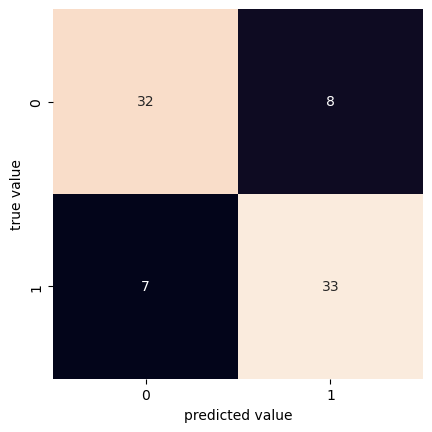

In [12]:
#матриця неточностей для навчалних даних
y_model_gaus_train = naive_bayes_GaussianNB.predict(x_train)
from sklearn.metrics import confusion_matrix
mat_gaus = confusion_matrix(y_train, y_model_gaus_train)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

In [13]:
#точність, повнома, міра для валідаційних даних
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
pre = precision_score(y_test, y_model_gaus, average='micro')
print("precision: {0}".format(pre))
rec = recall_score(y_test, y_model_gaus, average='micro')
print("recall: {0}".format(rec))
f1_sc = f1_score(y_test, y_model_gaus, average='micro')
print("f1_score: {0}".format(f1_sc))

precision: 0.9
recall: 0.9
f1_score: 0.9


In [14]:
#точність, повнома, міра для тестових даних
pre1 = precision_score(y_train, y_model_gaus1, average='micro')
print("precision: {0}".format(pre1))
rec1 = recall_score(y_train, y_model_gaus1, average='micro')
print("recall: {0}".format(rec1))
f1_sc1 = f1_score(y_train, y_model_gaus1, average='micro')
print("f1_score: {0}".format(f1_sc1))

precision: 0.8125
recall: 0.8125
f1_score: 0.8125


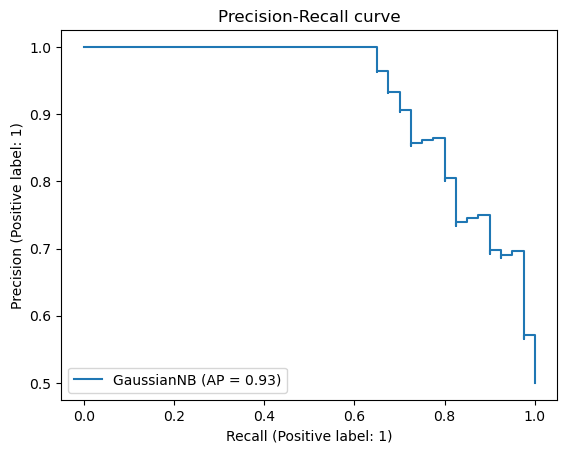

In [15]:
# крива точність-повнота начальні дані
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    naive_bayes_GaussianNB, x_train, y_train
)
_ = display.ax_.set_title("Precision-Recall curve")

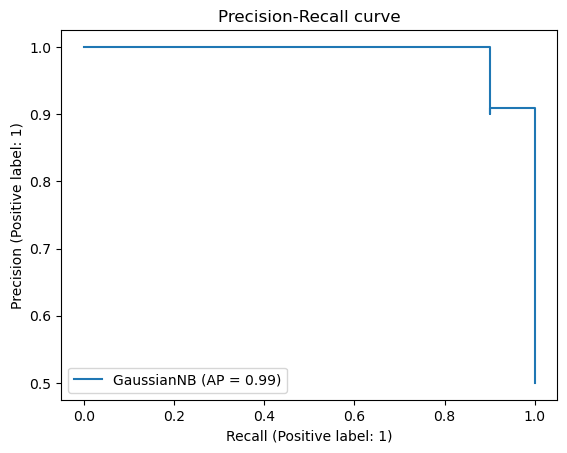

In [16]:
# крива точність-повнота валідаційні дані
from sklearn.metrics import PrecisionRecallDisplay
display1 = PrecisionRecallDisplay.from_estimator(
    naive_bayes_GaussianNB, x_test, y_test
)
_ = display1.ax_.set_title("Precision-Recall curve")

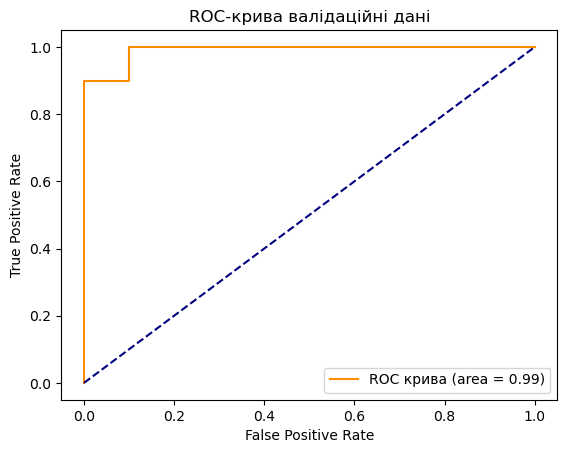

In [17]:
# roc крива валідаційні дані
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
baes_probs = naive_bayes_GaussianNB.predict_proba(x_test)

baes_probs = baes_probs[:, 1]

fpr, tpr, treshold = roc_curve(y_test, baes_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива валідаційні дані')
plt.legend(loc="lower right")
plt.show()

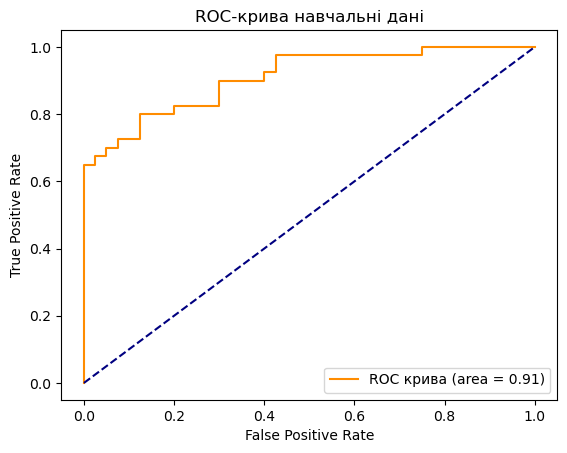

In [18]:
# roc крива навчальні дані
baes_probs1 = naive_bayes_GaussianNB.predict_proba(x_train)

baes_probs1 = baes_probs1[:, 1]

fpr1, tpr1, treshold1 = roc_curve(y_train, baes_probs1)
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива навчальні дані')
plt.legend(loc="lower right")
plt.show()

In [19]:
#Показник AUC навчальні дані
from sklearn import metrics
metrics.auc(fpr1, tpr1)

0.909375

In [20]:
#Показник AUC валідаційні дані
from sklearn import metrics
metrics.auc(fpr, tpr)

0.99

In [21]:
# grid search
from sklearn.model_selection import GridSearchCV
params = {
    'var_smoothing': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1, 1.5, 2, 3, 4, 10, 20]          
         }
naive_bayes_GaussianNB_grid = GridSearchCV(GaussianNB(), param_grid=params, scoring = 'accuracy', cv=5)
naive_bayes_GaussianNB_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(naive_bayes_GaussianNB_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(naive_bayes_GaussianNB_grid.best_score_))
y_predicted = naive_bayes_GaussianNB_grid.predict(x_test)
print(accuracy_score(y_test, y_predicted))

Best Parameters : {'var_smoothing': 0.01}
Best Accuracy Through Grid Search : 0.812

0.9


In [22]:
# grid search не дав кращу модель, що вже була

In [23]:
#навчу модель на підмножині навчальних даних та перевірю як змінилась модель

def subset_model(size):
    x_train_subset,_1, y_train_subset, _2 = train_test_split(x_train, y_train, test_size = size, shuffle = True, random_state = random_state_moon, stratify=y_train)
    naive_bayes_GaussianNB_subset = GaussianNB()
    naive_bayes_GaussianNB_subset.fit(x_train_subset , y_train_subset)
    y_model_gaus_subset = naive_bayes_GaussianNB_subset.predict(x_test)
    accuracy_score(y_test, y_model_gaus_subset)
    mat_gaus = confusion_matrix(y_test, y_model_gaus_subset)
    sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value') 
    plt.ylabel('true value')
    pre = precision_score(y_test, y_model_gaus_subset, average='macro')
    print("precision: {0}".format(pre))
    rec = recall_score(y_test, y_model_gaus_subset, average='macro')
    print("recall: {0}".format(rec))
    f1_sc = f1_score(y_test, y_model_gaus_subset, average='macro')
    print("f1_score: {0}".format(f1_sc))

precision: 0.9
recall: 0.9
f1_score: 0.9


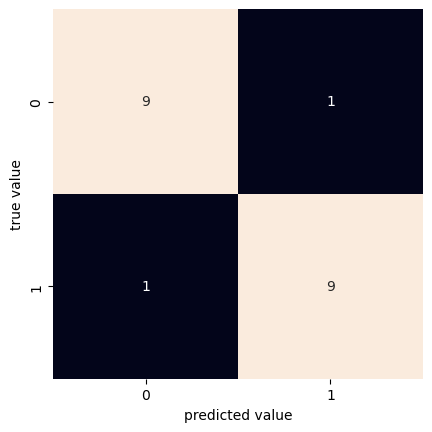

In [24]:
subset_model(0.8)

precision: 0.9545454545454546
recall: 0.95
f1_score: 0.949874686716792


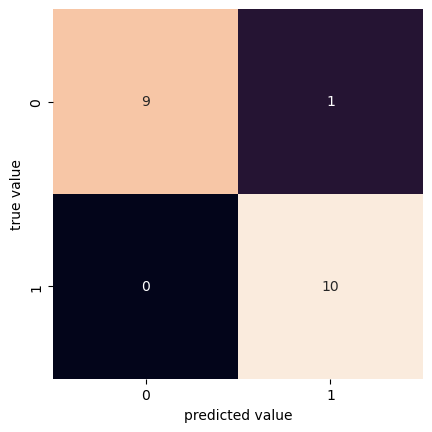

In [25]:
subset_model(0.6)

Якщо взяти підмножину навчальних даних та перевірити на одному і тому самому валідаційному наборі модель то вона або не зміниться, або її точність стане кращою

Модель краще себе показує на валідаційних даних ніж на тестових.

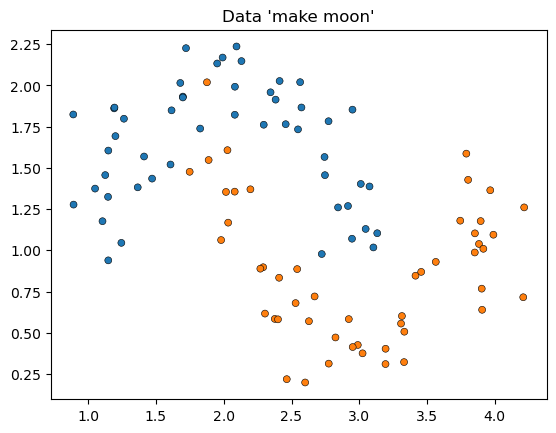

In [26]:
#зроблю дані додатнього знаку для використання класу 
x_data_moon_pos = np.copy(x_data_moon)
y_data_moon_pos = np.copy(y_data_moon)
for i in range(len(x_data_moon)):
    x_data_moon_pos[i][0] += 2
    x_data_moon_pos[i][1] += 1


#представлю дані
draw_data(x_data_moon_pos, y_data_moon_pos)

Розбити дані на навч та валідаційний

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_moon_pos, y_data_moon_pos, test_size = 0.20, shuffle = True, random_state = random_state_moon, stratify=y_data_moon_pos)

In [28]:
#будую модель
from sklearn.naive_bayes import MultinomialNB
naive_bayes_MultinomialNB = MultinomialNB(alpha = 40)
naive_bayes_MultinomialNB.fit(x_train, y_train)



MultinomialNB(alpha=40)

In [30]:
#прогноз на основі побудованої моделі
y_model_mul = naive_bayes_MultinomialNB.predict(x_train)
y_model_mul1 = naive_bayes_MultinomialNB.predict(x_test)
 

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [41]:
#Подивлюсь яка частина даних спрогнозованих моделлю відповідає істинним значенням 
#цих даних, таким чином перевірю модель на перенавченість

print(accuracy_score(y_test, y_model_mul1))
print(accuracy_score(y_train, y_model_mul))


0.95
0.775


In [42]:
# метрика якості для навч даних менша ніж для валідаційних отже модель не перенавчена

In [58]:
# grid search

params1 = {
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]       
         }
naive_bayes_MultinomialNB_grid = GridSearchCV(MultinomialNB(), param_grid=params1, scoring = 'accuracy', cv=5)
naive_bayes_MultinomialNB_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(naive_bayes_MultinomialNB_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(naive_bayes_MultinomialNB_grid.best_score_))
y_predicted = naive_bayes_MultinomialNB_grid.predict(x_test)
print(accuracy_score(y_test, y_predicted))

Best Parameters : {'alpha': 1}
Best Accuracy Through Grid Search : 0.800

0.9


In [59]:
# grid search підвищив точність класифікатора для навчальних даних але зменшив з 0.95 до 0.9 точність для валідаційних даних, тому залишаю початкову модель

In [60]:
#апостеріорні ймовірності
mul_probs = naive_bayes_MultinomialNB.predict_proba(x_test)
mul_probs1 = naive_bayes_MultinomialNB.predict_proba(x_train)

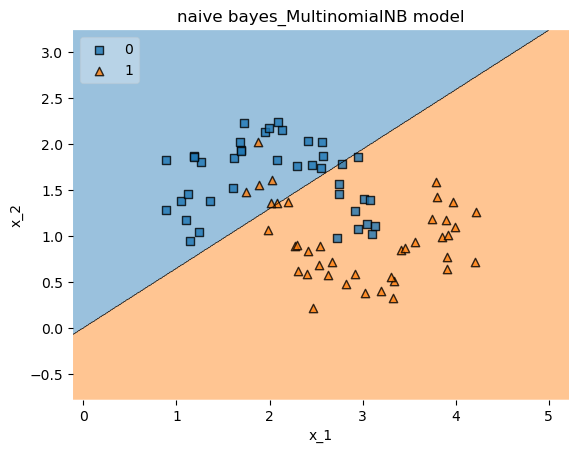

In [61]:
#побудую границі рішень графічно для моделі класифікації
plot_decision_regions(x_train, y_train, clf=naive_bayes_MultinomialNB, legend=2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('naive bayes_MultinomialNB model')
plt.show()

Text(113.9222222222222, 0.5, 'true value')

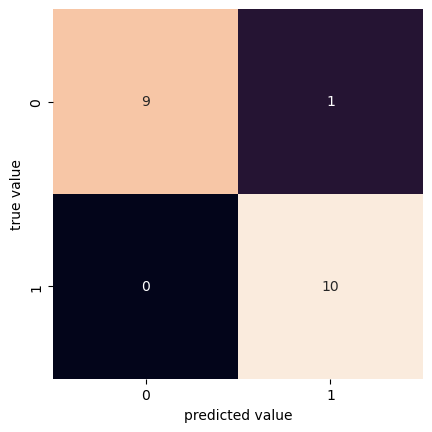

In [62]:
#матриця неточностей для валідаційних даних
mat_gaus = confusion_matrix(y_test, y_model_mul1)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

Text(113.9222222222222, 0.5, 'true value')

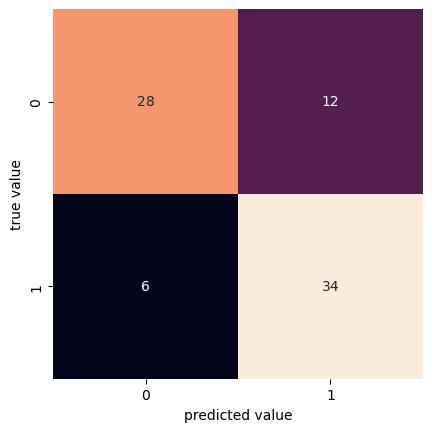

In [63]:
#матриця неточностей для навчалних даних
mat_gaus = confusion_matrix(y_train, y_model_mul)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

In [64]:
#точність, повнома, міра для валідаційних даних
pre = precision_score(y_test, y_model_mul1, average='micro')
print("precision: {0}".format(pre))
rec = recall_score(y_test, y_model_mul1, average='micro')
print("recall: {0}".format(rec))
f1_sc = f1_score(y_test, y_model_mul1, average='micro')
print("f1_score: {0}".format(f1_sc))

precision: 0.95
recall: 0.95
f1_score: 0.9500000000000001


In [65]:
#точність, повнома, міра для тестових даних
pre = precision_score(y_train, y_model_mul, average='micro')
print("precision: {0}".format(pre))
rec = recall_score(y_train, y_model_mul, average='micro')
print("recall: {0}".format(rec))
f1_sc = f1_score(y_train, y_model_mul, average='micro')
print("f1_score: {0}".format(f1_sc))

precision: 0.775
recall: 0.775
f1_score: 0.775


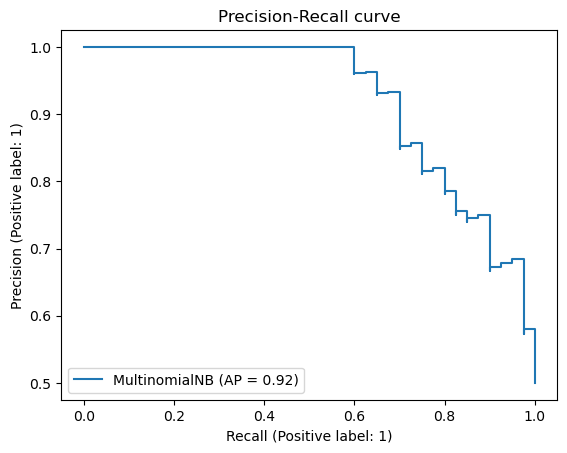

In [66]:
# крива точність-повнота начальні дані
display = PrecisionRecallDisplay.from_estimator(
    naive_bayes_MultinomialNB, x_train, y_train
)
_ = display.ax_.set_title("Precision-Recall curve")

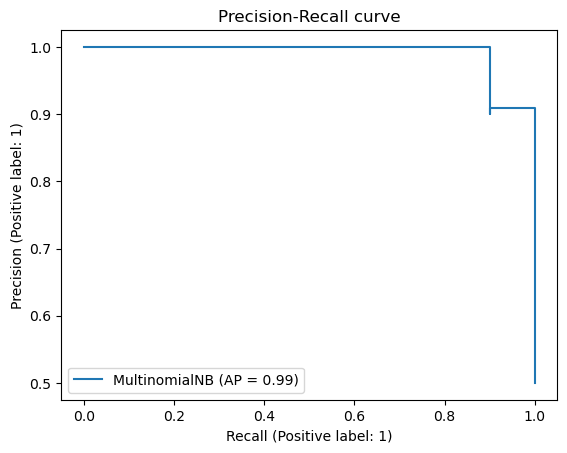

In [67]:
# крива точність-повнота валідаційні дані
display1 = PrecisionRecallDisplay.from_estimator(
    naive_bayes_MultinomialNB, x_test, y_test
)
_ = display1.ax_.set_title("Precision-Recall curve")

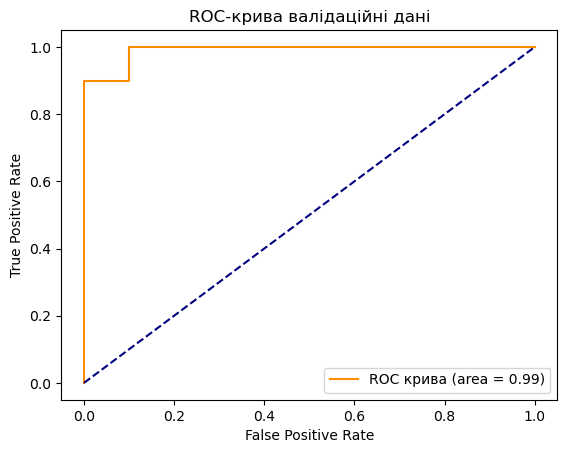

In [68]:
# roc крива валідаційні дані


mul_probs = mul_probs[:, 1]

fpr, tpr, treshold = roc_curve(y_test, mul_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива валідаційні дані')
plt.legend(loc="lower right")
plt.show()

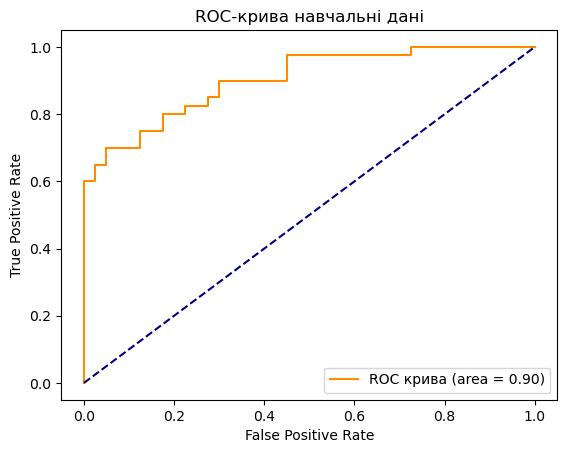

In [69]:
# roc крива навчальні дані


mul_probs1 = mul_probs1[:, 1]

fpr1, tpr1, treshold1 = roc_curve(y_train, mul_probs1)
roc_auc = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива навчальні дані')
plt.legend(loc="lower right")
plt.show()

In [70]:
#Показник AUC навчальні дані
metrics.auc(fpr1, tpr1)


0.901875

In [71]:
#Показник AUC валідаційні дані
metrics.auc(fpr, tpr)

0.99

In [72]:
#для даних make_moon я перевірив дві моделі MultinomialNB та GaussianNB
#дві моделі краще працюють з валідаційними даними, точність цих моделей не найкраща, модель не перенавчена
#показник AUC MultinomialNB моделі: 
#1) навчальні дані: для 0.901875
#2) валід дані: 0.99
# валід: precision: 0.95
# recall: 0.95
# f1_score: 0.9500000000000001
#показник AUC GaussianNB моделі: 
#1) навчальні дані: для 0.909375
#2) валід дані: 0.99
# валід: precision: 0.9
# recall: 0.9
# f1_score: 0.9
# для даних make_moon  для перевірочних даних точність моделі MultinomialNB вище тому я оберу її як найкращу модель

In [73]:
#навчу модель на підмножині навчальних даних та перевірю як змінилась модель

def subset_model1(size):
    x_train_subset,_1, y_train_subset, _2 = train_test_split(x_train, y_train, test_size = size, shuffle = True, random_state = random_state_moon, stratify=y_train)
    naive_bayes_MultinomialNB_subset = MultinomialNB()
    naive_bayes_MultinomialNB_subset.fit(x_train_subset , y_train_subset)
    y_model_mul_subset = naive_bayes_MultinomialNB_subset.predict(x_test)
    accuracy_score(y_test, y_model_mul_subset)
    mat_gaus = confusion_matrix(y_test,  y_model_mul_subset)
    sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value') 
    plt.ylabel('true value')
    pre = precision_score(y_test,  y_model_mul_subset, average='micro')
    print("precision: {0}".format(pre))
    rec = recall_score(y_test,  y_model_mul_subset, average='micro')
    print("recall: {0}".format(rec))
    f1_sc = f1_score(y_test,  y_model_mul_subset, average='micro')
    print("f1_score: {0}".format(f1_sc))

precision: 0.9
recall: 0.9
f1_score: 0.9


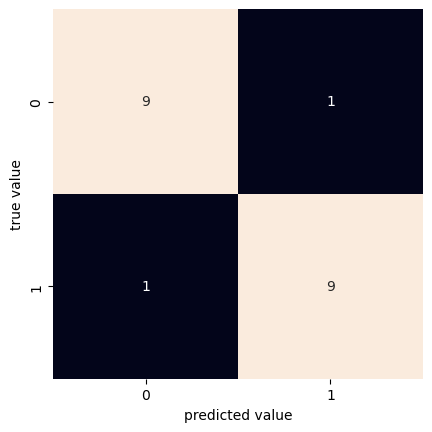

In [74]:
subset_model1(0.6)

precision: 0.95
recall: 0.95
f1_score: 0.9500000000000001


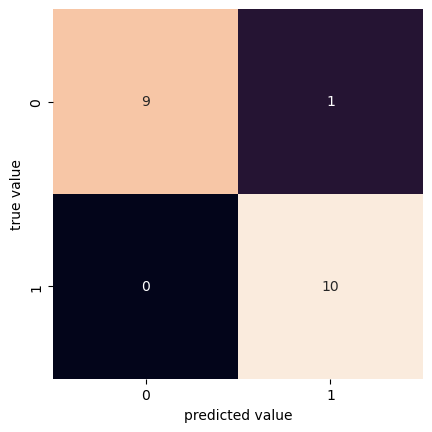

In [75]:
subset_model1(0.8)

In [76]:
#Якщо взяти підмножину навчальних даних та перевірити на одному і тому 
#самому валідаційному наборі модель то вона або не зміниться, або її точність стане гіршою

In [79]:
from sklearn.datasets import load_digits 
digits = load_digits(n_class = 10)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


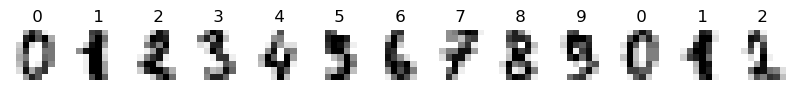

In [81]:
# представлю початкові дані

_, axes = plt.subplots(nrows=1, ncols=13, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(" %i" % label)

In [82]:
#Розбити набір на навчальний та валідаційний
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.20, shuffle = True, random_state = random_state_moon, stratify=digits.target)

In [83]:
#Будую модель класифікації на навчальних даних

naive_bayes_GaussianNB_image = GaussianNB()
naive_bayes_GaussianNB_image.fit(x_train , y_train)

GaussianNB()

In [84]:
#Зроблю прогноз для naive bayes_GaussianNB model

y_model_gaus_image = naive_bayes_GaussianNB_image.predict(x_test)
y_model_gaus_image1 = naive_bayes_GaussianNB_image.predict(x_train)

In [85]:
#Подивлюсь яка частина даних спрогнозованих моделлю відповідає істинним значенням 
#цих даних, таким чином перевірю модель на перенавченість
print(accuracy_score(y_test, y_model_gaus_image))
print(accuracy_score(y_train, y_model_gaus_image1))


0.8527777777777777
0.8810020876826722


In [91]:
# grid search
from sklearn.model_selection import GridSearchCV
params = {
    'var_smoothing': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1, 1.5, 2, 3, 4, 10, 20]          
         }
naive_bayes_GaussianNB_grid = GridSearchCV(GaussianNB(), param_grid=params, scoring = 'accuracy', cv=5)
naive_bayes_GaussianNB_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(naive_bayes_GaussianNB_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(naive_bayes_GaussianNB_grid.best_score_))
y_predicted = naive_bayes_GaussianNB_grid.predict(x_test)
print(accuracy_score(y_test, y_predicted))

Best Parameters : {'var_smoothing': 0.1}
Best Accuracy Through Grid Search : 0.923

0.9222222222222223


In [94]:
# grid search збільшив точність моєї моделі тому використаю цю модель для прогнозування
naive_bayes_GaussianNB_image = GaussianNB(var_smoothing = 0.1)
naive_bayes_GaussianNB_image.fit(x_train , y_train)
y_model_gaus_image = naive_bayes_GaussianNB_image.predict(x_test)
y_model_gaus_image1 = naive_bayes_GaussianNB_image.predict(x_train)
#Подивлюсь яка частина даних спрогнозованих моделлю відповідає істинним значенням 
#цих даних, таким чином перевірю модель на перенавченість
print(accuracy_score(y_test, y_model_gaus_image))
print(accuracy_score(y_train, y_model_gaus_image1))


0.9222222222222223
0.9324982602644398


In [95]:
#метрики якості для навч та валідаційних даних майже однакові отже модель не перенавчена

In [96]:
#апостеріорні ймовірності
baes_probs_image = naive_bayes_GaussianNB_image.predict_proba(x_test)
baes_probs_image1 = naive_bayes_GaussianNB_image.predict_proba(x_train)

Text(113.9222222222222, 0.5, 'true value')

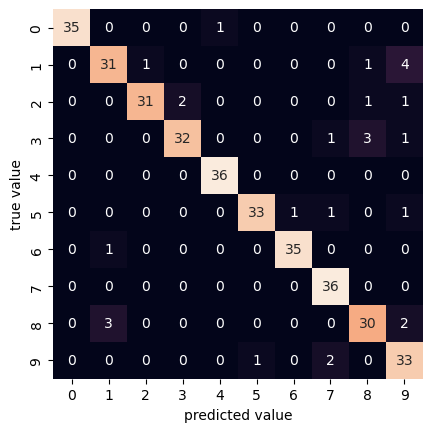

In [97]:
#матриця неточностей для валідаційних даних

mat_gaus = confusion_matrix(y_test, y_model_gaus_image)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value')

Text(113.9222222222222, 0.5, 'true value')

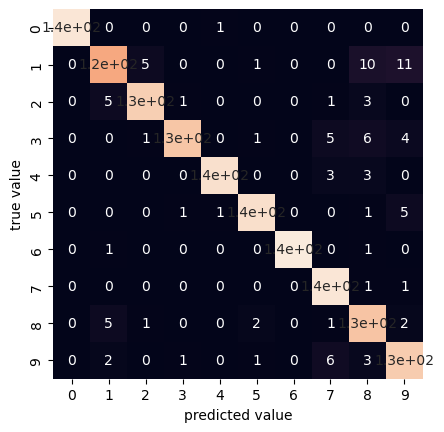

In [98]:
#матриця неточностей для навчалних даних

mat_gaus = confusion_matrix(y_train, y_model_gaus_image1)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

In [99]:
#точність, повнома, міра для валідаційних даних
from sklearn.metrics import classification_report
target_names1 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test, y_model_gaus_image, target_names=target_names1))

#pre = precision_score(y_test, y_model_gaus_image, average='micro')
#print("precision: {0}".format(pre))
#rec = recall_score(y_test, y_model_gaus_image, average='micro')
#print("recall: {0}".format(rec))
#f1_sc = f1_score(y_test, y_model_gaus_image, average='micro')
#print("f1_score: {0}".format(f1_sc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.84      0.86        37
           2       0.97      0.89      0.93        35
           3       0.94      0.86      0.90        37
           4       0.97      1.00      0.99        36
           5       0.97      0.92      0.94        36
           6       0.97      0.97      0.97        36
           7       0.90      1.00      0.95        36
           8       0.86      0.86      0.86        35
           9       0.79      0.92      0.85        36

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360



In [100]:
#точність, повнома, міра для навчальних даних
from sklearn.metrics import classification_report
target_names1 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_train, y_model_gaus_image1, target_names=target_names1))

#pre1 = precision_score(y_train, y_model_gaus_image1, average='micro')
#print("precision: {0}".format(pre1))
#rec1 = recall_score(y_train, y_model_gaus_image1, average='micro')
#print("recall: {0}".format(rec1))
#f1_sc1 = f1_score(y_train, y_model_gaus_image1, average='micro')
#print("f1_score: {0}".format(f1_sc1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       142
           1       0.90      0.81      0.86       145
           2       0.95      0.93      0.94       142
           3       0.98      0.88      0.93       146
           4       0.99      0.96      0.97       145
           5       0.97      0.95      0.96       146
           6       1.00      0.99      0.99       145
           7       0.90      0.99      0.94       143
           8       0.82      0.92      0.87       139
           9       0.85      0.91      0.88       144

    accuracy                           0.93      1437
   macro avg       0.93      0.93      0.93      1437
weighted avg       0.94      0.93      0.93      1437



In [101]:
# крива точність-повнота начальні дані
from sklearn.metrics import precision_recall_curve

#precision, recall, _ = precision_recall_curve(y_train, y_model_gaus_image1)
#disp = PrecisionRecallDisplay(precision=precision, recall=recall)
#disp.plot()
#plt.show()

In [102]:
# крива точність-повнота валідаційні дані
#from sklearn.metrics import precision_recall_curve
#precision, recall, _ = precision_recall_curve(y_test, y_model_gaus_image)
#disp = PrecisionRecallDisplay(precision=precision, recall=recall)
#disp.plot()
#plt.show()

In [103]:
# roc крива валідаційні дані


#baes_probs_image = baes_probs_image[:, 1]

#fpr, tpr, treshold = roc_curve(y_test, baes_probs_image)
#roc_auc = auc(fpr, tpr)

#plt.plot(fpr, tpr, color='darkorange',
 #        label='ROC крива (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC-крива валідаційні дані')
#plt.legend(loc="lower right")
#plt.show()

In [104]:
# roc крива навчальні дані


#baes_probs_image1 = baes_probs_image1[:, 1]

#fpr1, tpr1, treshold1 = roc_curve(y_train, baes_probs_image1)
#roc_auc = auc(fpr1, tpr1)

#plt.plot(fpr1, tpr1, color='darkorange',
#         label='ROC крива (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC-крива навчальні дані')
#plt.legend(loc="lower right")
#plt.show()

In [105]:
#Показник AUC навчальні дані
#from sklearn import metrics
#metrics.auc(fpr1, tpr1)

In [106]:
#Показник AUC валідаційні дані
#from sklearn import metrics
#metrics.auc(fpr, tpr)

In [116]:
#навчу модель на підмножині навчальних даних та перевірю як змінилась модель

def subset_model(size):
    x_train_subset,_1, y_train_subset, _2 = train_test_split(x_train, y_train, test_size = size, shuffle = True, random_state = random_state_moon, stratify=y_train)
    naive_bayes_GaussianNB_subset = GaussianNB()
    naive_bayes_GaussianNB_subset.fit(x_train_subset , y_train_subset)
    y_model_gaus_subset = naive_bayes_GaussianNB_subset.predict(x_test)
    accuracy_score(y_test, y_model_gaus_subset)
    mat_gaus = confusion_matrix(y_test, y_model_gaus_subset)
    sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value') 
    plt.ylabel('true value')
    pre = precision_score(y_test, y_model_gaus_subset, average='macro')
    print("precision: {0}".format(pre))
    rec = recall_score(y_test, y_model_gaus_subset, average='macro')
    print("recall: {0}".format(rec))
    f1_sc = f1_score(y_test, y_model_gaus_subset, average='macro')
    print("f1_score: {0}".format(f1_sc))
    accu = accuracy_score(y_test, y_model_gaus_subset)
    print("accuracy_score: {0}".format(accu))
    

precision: 0.848375251465965
recall: 0.8392256542256542
f1_score: 0.8384506755198073
accuracy_score: 0.8388888888888889


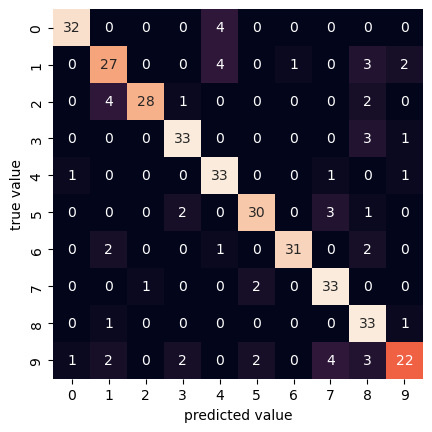

In [120]:
subset_model(0.8)

precision: 0.8520463632781841
recall: 0.8308665808665809
f1_score: 0.8299267220121254
accuracy_score: 0.8305555555555556


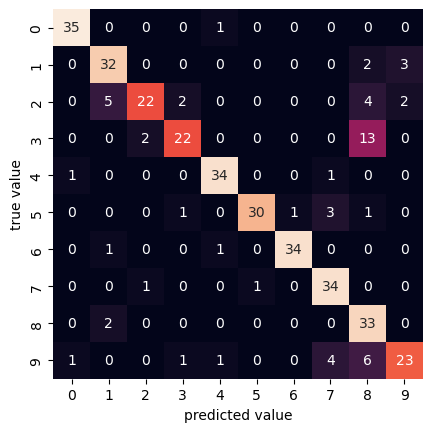

In [121]:
subset_model(0.5)

precision: 0.8615882124411536
recall: 0.8506370656370656
f1_score: 0.848964921192201
accuracy_score: 0.85


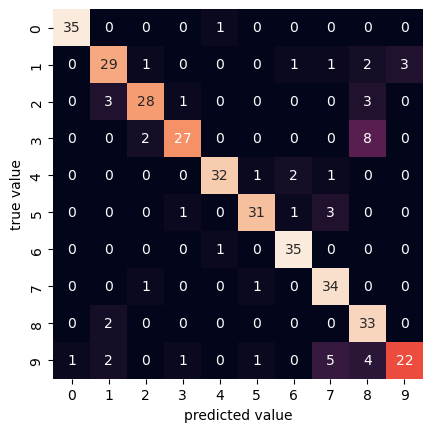

In [122]:
subset_model(0.2)

In [123]:
#модель на підмножині тестових даних робить прогноз для валідаційних даних гірше


In [124]:
#будую модель

naive_bayes_MultinomialNB_image = MultinomialNB()
naive_bayes_MultinomialNB_image.fit(x_train, y_train)

MultinomialNB()

In [125]:

#прогноз на основі побудованої моделі
y_model_mul_image = naive_bayes_MultinomialNB_image.predict(x_train)
y_model_mul_image1 = naive_bayes_MultinomialNB_image.predict(x_test)


In [126]:
#Подивлюсь яка частина даних спрогнозованих моделлю відповідає істинним значенням 
#цих даних, таким чином перевірю модель на перенавченість
print(accuracy_score(y_test, y_model_mul_image1))
print(accuracy_score(y_train, y_model_mul_image))

0.8972222222222223
0.9081419624217119


In [127]:
# grid search

params1 = {
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]       
         }
naive_bayes_MultinomialNB_grid = GridSearchCV(MultinomialNB(), param_grid=params1, scoring = 'accuracy', cv=5)
naive_bayes_MultinomialNB_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(naive_bayes_MultinomialNB_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(naive_bayes_MultinomialNB_grid.best_score_))
y_predicted = naive_bayes_MultinomialNB_grid.predict(x_test)
print(accuracy_score(y_test, y_predicted))

Best Parameters : {'alpha': 1}
Best Accuracy Through Grid Search : 0.898

0.8972222222222223


In [128]:
# grid search не змінив якість прогнозування моделі тому залишаю свою содель
#метрики якості для валідаційних та навч даних майже не відрізняються отже модель не перенавчена

In [129]:
#апостеріорні ймовірності
mul_probs_image = naive_bayes_MultinomialNB_image.predict_proba(x_test)
mul_probs_image1 = naive_bayes_MultinomialNB_image.predict_proba(x_train)

Text(113.9222222222222, 0.5, 'true value')

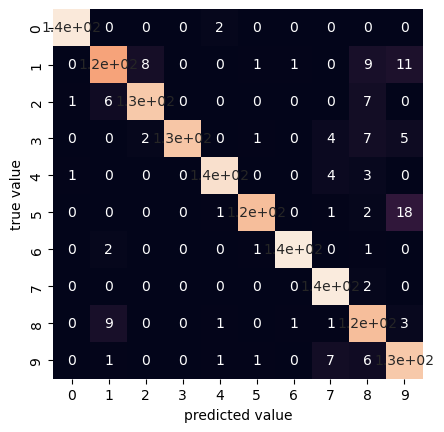

In [130]:
#матриця неточностей для навчалних даних

mat_gaus = confusion_matrix(y_train, y_model_mul_image)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

Text(113.9222222222222, 0.5, 'true value')

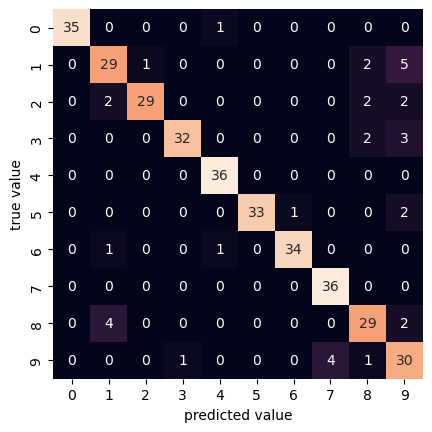

In [131]:
#матриця неточностей для валідаційних даних

mat_gaus = confusion_matrix(y_test, y_model_mul_image1)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

In [132]:
#точність, повнома, міра для валідаційних даних
from sklearn.metrics import classification_report
target_names1 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test, y_model_gaus_image, target_names=target_names1))

#pre = precision_score(y_test, y_model_mul_image1, average='micro')
#print("precision: {0}".format(pre))
#rec = recall_score(y_test, y_model_mul_image1, average='micro')
#print("recall: {0}".format(rec))
#f1_sc = f1_score(y_test, y_model_mul_image1, average='micro')
#print("f1_score: {0}".format(f1_sc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.84      0.86        37
           2       0.97      0.89      0.93        35
           3       0.94      0.86      0.90        37
           4       0.97      1.00      0.99        36
           5       0.97      0.92      0.94        36
           6       0.97      0.97      0.97        36
           7       0.90      1.00      0.95        36
           8       0.86      0.86      0.86        35
           9       0.79      0.92      0.85        36

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360



In [133]:
#точність, повнома, міра для навчальні даних
from sklearn.metrics import classification_report
target_names1 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_train, y_model_gaus_image1, target_names=target_names1))

#pre1 = precision_score(y_train, y_model_mul_image, average='micro')
#print("precision: {0}".format(pre1))
#rec1 = recall_score(y_train, y_model_mul_image, average='micro')
#print("recall: {0}".format(rec1))
#f1_sc1 = f1_score(y_train, y_model_mul_image, average='micro')
#print("f1_score: {0}".format(f1_sc1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       142
           1       0.90      0.81      0.86       145
           2       0.95      0.93      0.94       142
           3       0.98      0.88      0.93       146
           4       0.99      0.96      0.97       145
           5       0.97      0.95      0.96       146
           6       1.00      0.99      0.99       145
           7       0.90      0.99      0.94       143
           8       0.82      0.92      0.87       139
           9       0.85      0.91      0.88       144

    accuracy                           0.93      1437
   macro avg       0.93      0.93      0.93      1437
weighted avg       0.94      0.93      0.93      1437



In [134]:
# крива точність-повнота начальні дані
#display = PrecisionRecallDisplay.from_estimator(
#    naive_bayes_MultinomialNB_image, x_train, y_train
#)
#_ = display.ax_.set_title("Precision-Recall curve")

In [135]:
# крива точність-повнота валідаційні дані
#display = PrecisionRecallDisplay.from_estimator(
#    naive_bayes_MultinomialNB_image, x_test, y_test
#)
#_ = display.ax_.set_title("Precision-Recall curve")

In [136]:
# roc крива валідаційні дані



#mul_probs_image = mul_probs_image[:, 1]

#fpr, tpr, treshold = roc_curve(y_test, mul_probs_image)
#roc_auc = auc(fpr, tpr)

#plt.plot(fpr, tpr, color='darkorange',
#         label='ROC крива (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC-крива валідаційні дані')
#plt.legend(loc="lower right")
#plt.show()

In [137]:
# roc крива навчальні дані

#mul_probs_image1 = mul_probs_image1[:, 1]

#fpr1, tpr1, treshold1 = roc_curve(y_train, mul_probs_image1)
#roc_auc = auc(fpr1, tpr1)

#plt.plot(fpr1, tpr1, color='darkorange',
#         label='ROC крива (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC-крива навчальні дані')
#plt.legend(loc="lower right")
#plt.show()

In [138]:
#Показник AUC навчальні дані
#metrics.auc(fpr1, tpr1)


In [139]:
#Показник AUC валідаційні дані
#metrics.auc(fpr, tpr)

In [140]:
#навчу модель на підмножині навчальних даних та перевірю як змінилась модель

def subset_model4(size):
    x_train_subset,_1, y_train_subset, _2 = train_test_split(x_train, y_train, test_size = size, shuffle = True, random_state = random_state_moon, stratify=y_train)
    naive_bayes_MultinomialNB_subset = MultinomialNB()
    naive_bayes_MultinomialNB_subset.fit(x_train_subset , y_train_subset)
    y_model_mul_subset = naive_bayes_MultinomialNB_subset.predict(x_test)
    accuracy_score(y_test, y_model_mul_subset)
    mat_gaus = confusion_matrix(y_test,  y_model_mul_subset)
    sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value') 
    plt.ylabel('true value')
    pre = precision_score(y_test,  y_model_mul_subset, average='micro')
    print("precision: {0}".format(pre))
    rec = recall_score(y_test,  y_model_mul_subset, average='micro')
    print("recall: {0}".format(rec))
    f1_sc = f1_score(y_test,  y_model_mul_subset, average='micro')
    print("f1_score: {0}".format(f1_sc))

precision: 0.875
recall: 0.875
f1_score: 0.875


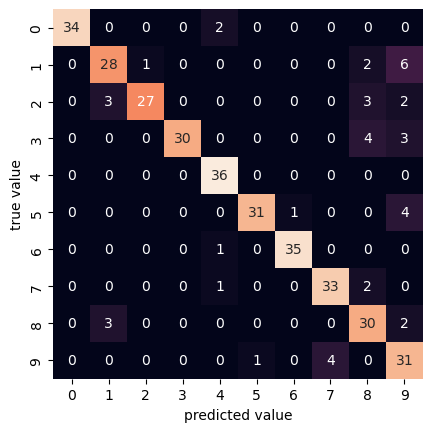

In [141]:
subset_model4(0.8)

precision: 0.8888888888888888
recall: 0.8888888888888888
f1_score: 0.8888888888888888


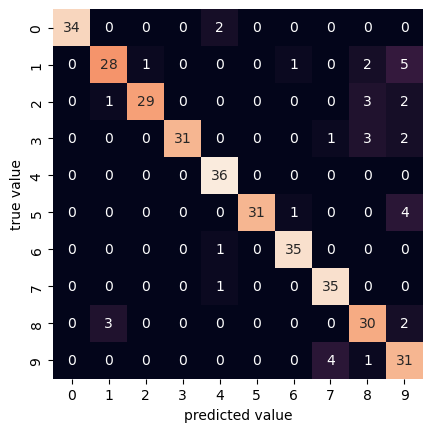

In [142]:
subset_model4(0.6)

In [144]:
#модель на підмножині тестових даних робить прогноз для валідаційних даних або так само або трішки гірше
# оскільки в мене більше 2 класів то замість метрик для оцінки якості моделі буду дивитись на 
#матрицю неточностей, обидві моделі гарно прогнозують дані але GaussianNB більше валідаційних даних 
#спрогнозував правильно, тому я обеду саме цю модель для даних koad_digits

In [145]:
import sklearn.datasets 
digits = load_digits(n_class = 2)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


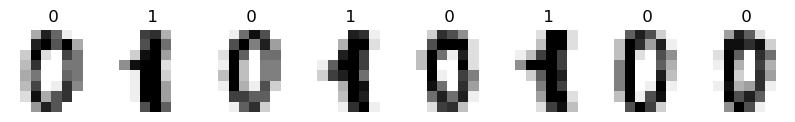

In [146]:
# представлю початкові дані

_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(" %i" % label)


In [147]:
#Розбити набір на навчальний та валідаційний
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.20, shuffle = True, random_state = random_state_moon, stratify=digits.target)

In [148]:
#будую модель

naive_bayes_MultinomialNB_image = MultinomialNB()
naive_bayes_MultinomialNB_image.fit(x_train, y_train)

MultinomialNB()

In [149]:
#прогноз на основі побудованої моделі
y_model_mul_image = naive_bayes_MultinomialNB_image.predict(x_train)
y_model_mul_image1 = naive_bayes_MultinomialNB_image.predict(x_test)


In [150]:
#Подивлюсь яка частина даних спрогнозованих моделлю відповідає істинним значенням 
#цих даних, таким чином перевірю модель на перенавченість
print(accuracy_score(y_test, y_model_mul_image1))
print(accuracy_score(y_train, y_model_mul_image))

0.9722222222222222
0.9965277777777778


In [151]:
# метрики якості для навч та валідаційних даних майже не відрізняються отже модень не перенавчена

In [152]:
#апостеріорні ймовірності
mul_probs_image = naive_bayes_MultinomialNB_image.predict_proba(x_test)
mul_probs_image1 = naive_bayes_MultinomialNB_image.predict_proba(x_train)

Text(113.9222222222222, 0.5, 'true value')

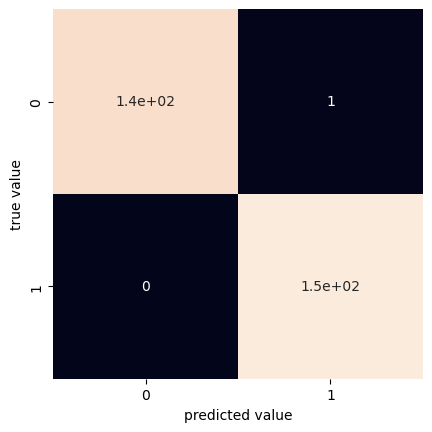

In [153]:
#матриця неточностей для навчалних даних

mat_gaus = confusion_matrix(y_train, y_model_mul_image)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

Text(113.9222222222222, 0.5, 'true value')

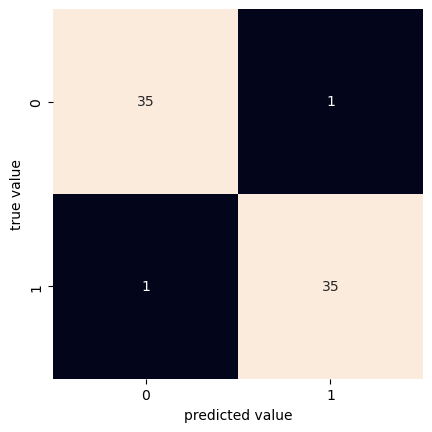

In [154]:
#матриця неточностей для валідаційних даних

mat_gaus = confusion_matrix(y_test, y_model_mul_image1)
sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value') 

In [155]:
#точність, повнома, міра для валідаційних даних


pre = precision_score(y_test, y_model_mul_image1, average='micro')
print("precision: {0}".format(pre))
rec = recall_score(y_test, y_model_mul_image1, average='micro')
print("recall: {0}".format(rec))
f1_sc = f1_score(y_test, y_model_mul_image1, average='micro')
print("f1_score: {0}".format(f1_sc))

precision: 0.9722222222222222
recall: 0.9722222222222222
f1_score: 0.9722222222222222


In [156]:
#точність, повнома, міра для навчальні даних


pre1 = precision_score(y_train, y_model_mul_image, average='micro')
print("precision: {0}".format(pre1))
rec1 = recall_score(y_train, y_model_mul_image, average='micro')
print("recall: {0}".format(rec1))
f1_sc1 = f1_score(y_train, y_model_mul_image, average='micro')
print("f1_score: {0}".format(f1_sc1))

precision: 0.9965277777777778
recall: 0.9965277777777778
f1_score: 0.9965277777777778


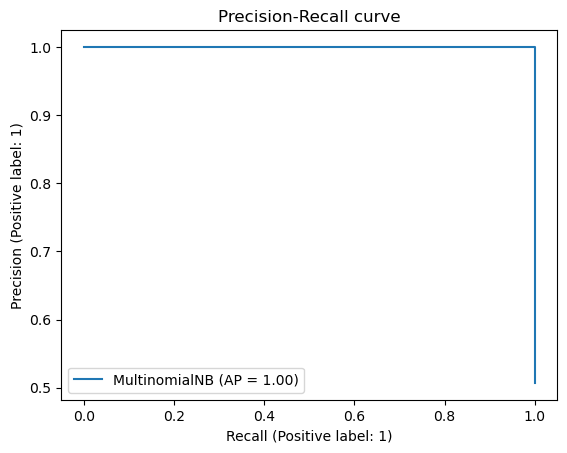

In [157]:
# крива точність-повнота начальні дані
display = PrecisionRecallDisplay.from_estimator(
    naive_bayes_MultinomialNB_image, x_train, y_train
)
_ = display.ax_.set_title("Precision-Recall curve")

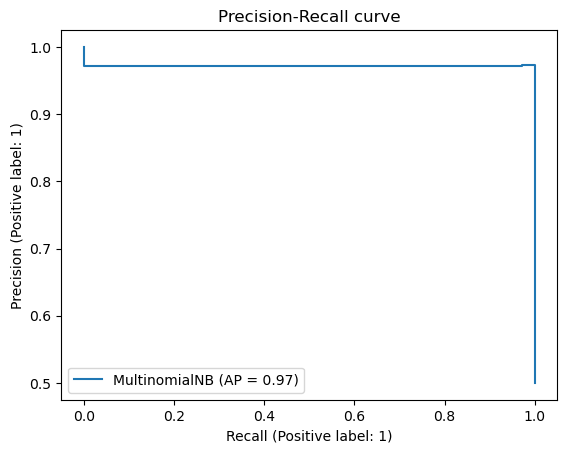

In [158]:
# крива точність-повнота валідаційні дані
display = PrecisionRecallDisplay.from_estimator(
    naive_bayes_MultinomialNB_image, x_test, y_test
)
_ = display.ax_.set_title("Precision-Recall curve")

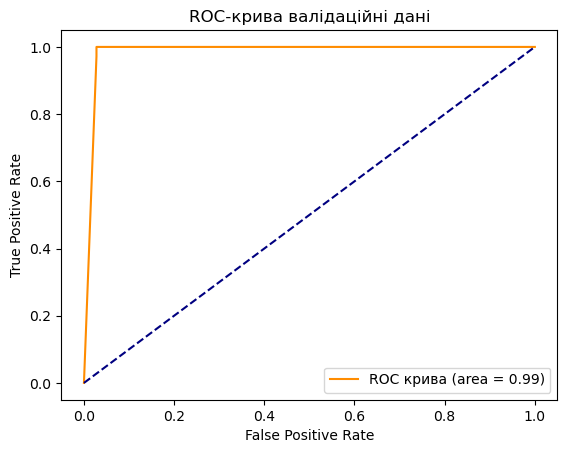

In [159]:
# roc крива валідаційні дані



mul_probs_image = mul_probs_image[:, 1]
fpr, tpr, treshold = roc_curve(y_test, mul_probs_image)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива валідаційні дані')
plt.legend(loc="lower right")
plt.show()

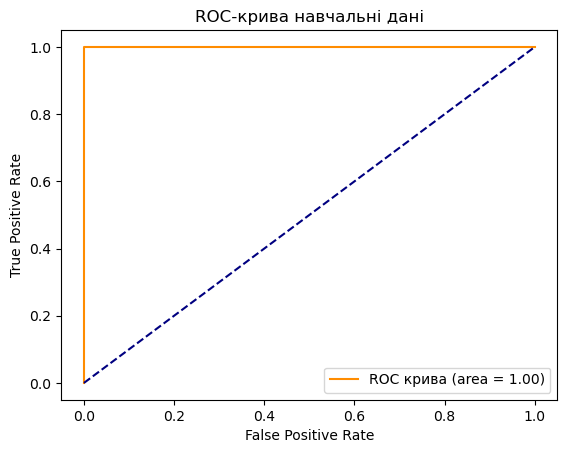

In [160]:
# roc крива навчальні дані

mul_probs_image1 = mul_probs_image1[:, 1]
fpr1, tpr1, treshold1 = roc_curve(y_train, mul_probs_image1)
roc_auc = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива навчальні дані')
plt.legend(loc="lower right")
plt.show()

In [161]:
#Показник AUC навчальні дані
metrics.auc(fpr1, tpr1)

1.0

In [162]:
#Показник AUC валідаційні дані
metrics.auc(fpr, tpr)

0.9857253086419753

In [163]:
#навчу модель на підмножині навчальних даних та перевірю як змінилась модель

def subset_model4(size):
    x_train_subset,_1, y_train_subset, _2 = train_test_split(x_train, y_train, test_size = size, shuffle = True, random_state = random_state_moon, stratify=y_train)
    naive_bayes_MultinomialNB_subset = MultinomialNB()
    naive_bayes_MultinomialNB_subset.fit(x_train_subset , y_train_subset)
    y_model_mul_subset = naive_bayes_MultinomialNB_subset.predict(x_test)
    accuracy_score(y_test, y_model_mul_subset)
    mat_gaus = confusion_matrix(y_test,  y_model_mul_subset)
    sns.heatmap(mat_gaus, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value') 
    plt.ylabel('true value')
    pre = precision_score(y_test,  y_model_mul_subset, average='micro')
    print("precision: {0}".format(pre))
    rec = recall_score(y_test,  y_model_mul_subset, average='micro')
    print("recall: {0}".format(rec))
    f1_sc = f1_score(y_test,  y_model_mul_subset, average='micro')
    print("f1_score: {0}".format(f1_sc))


precision: 0.9861111111111112
recall: 0.9861111111111112
f1_score: 0.9861111111111112


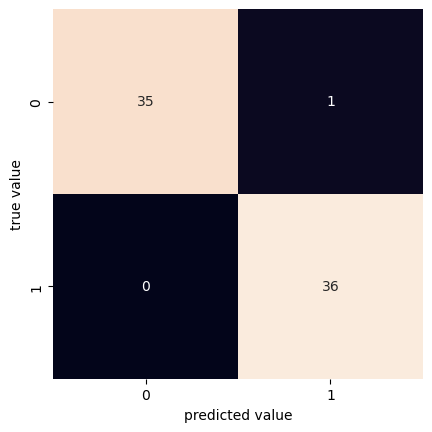

In [164]:
subset_model4(0.8)

precision: 0.9722222222222222
recall: 0.9722222222222222
f1_score: 0.9722222222222222


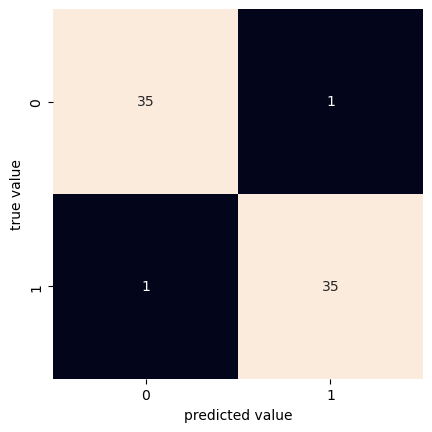

In [165]:
subset_model4(0.6)

In [166]:
#при взяття для навчання моделі підмножина навчальних даних точність прогнозу стає меншою
# ця модель дає дуже гарні результати, метрики якості близькі до одиниці, модель з великою ймовірністю 
# дасть правильний прогноз